<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

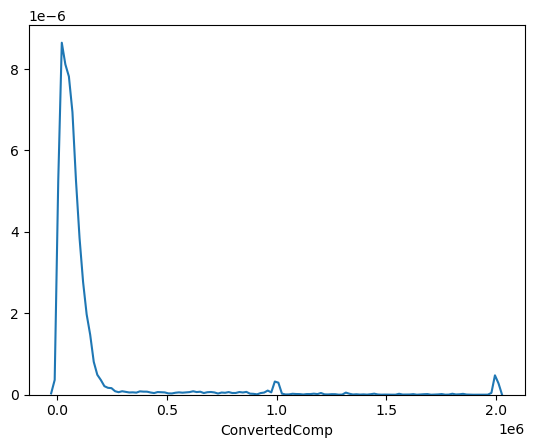

In [14]:

sns.distplot(df['ConvertedComp'],hist=False)

Plot the histogram for the column `ConvertedComp`.


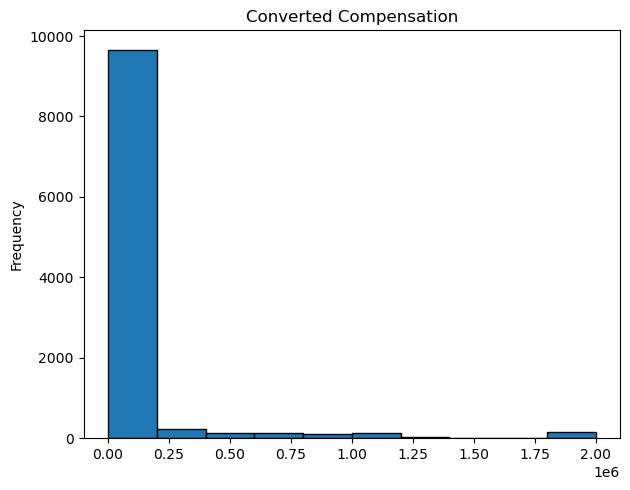

In [27]:
df['ConvertedComp'].plot(kind='hist', bins=10, edgecolor='black')

plt.tight_layout()
plt.title('Converted Compensation')
plt.show()

What is the median of the column `ConvertedComp`?


In [15]:
column_median = df['ConvertedComp'].median()

print(column_median)


57745.0


How many responders identified themselves only as a **Man**?


In [18]:
num_man = (df['Gender'] == 'Man').sum() 

print(num_man)



10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [37]:
females = df[df['Gender'] == 'Woman']
female_converted_median = females['ConvertedComp'].median()

print('Median ConvertedComp for Females:', female_converted_median)



Median ConvertedComp for Females: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:

data=df['Age']
series = pd.Series(data)

q1 = series.quantile(0.25)
median = series.median()
q3 = series.quantile(0.75) 

five_num_summary = {
    "min": series.min(),
    "Q1": q1,
    "median": median,
    "Q3": q3,  
    "max": series.max()     
}

print(five_num_summary)


{'min': 16.0, 'Q1': 25.0, 'median': 29.0, 'Q3': 35.0, 'max': 99.0}


Plot a histogram of the column `Age`.


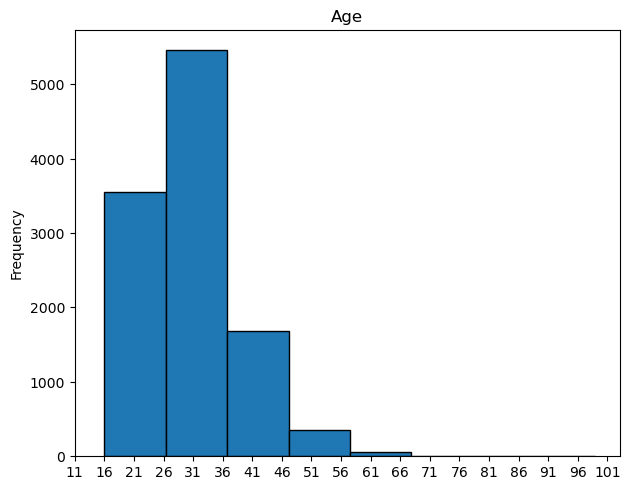

In [40]:
ax = df['Age'].plot(kind='hist', bins=8, edgecolor='black')

plt.tight_layout()  
plt.title('Age')
  
# Set x-axis tick labels  
bin_edges = ax.get_xbound()
ax.set_xticks(range(int(bin_edges[0]), int(bin_edges[1])+2, 5))

plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

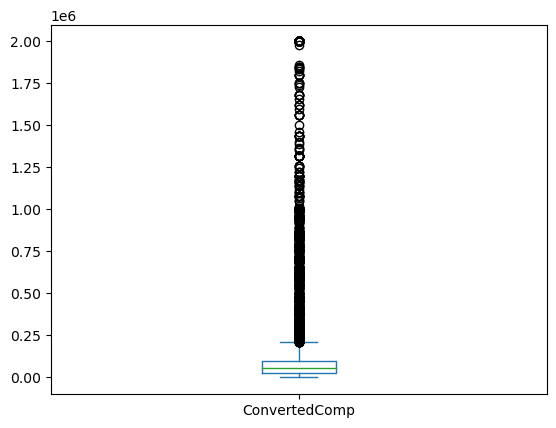

In [44]:

df['ConvertedComp'].plot(kind='box')


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [31]:
data_comp=df['ConvertedComp']
series_comp = pd.Series(data_comp)

q1 = series_comp.quantile(0.25)
median = series_comp.median()
q3 = series_comp.quantile(0.75) 

five_num_summary_comp = {
    "min": series_comp.min(),
    "Q1": q1,
    "median": median,
    "Q3": q3,  
    "max": series_comp.max()     
}

print(five_num_summary_comp)

IQR_comp = q3-q1
print("IQR_comp:",IQR_comp)



{'min': 0.0, 'Q1': 26868.0, 'median': 57745.0, 'Q3': 100000.0, 'max': 2000000.0}
IQR_comp: 73132.0


Find out the upper and lower bounds.


In [32]:
comp_bounds= {
   "max": series_comp.max(),
    "min": series_comp.min()
}
print("comp_bounds:",comp_bounds)


comp_bounds: {'max': 2000000.0, 'min': 0.0}


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:

print(((df['ConvertedComp'] < (q1 - 1.5 * IQR_comp)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR_comp))).sum())  

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [47]:
lower_bound = q1 - (1.5 * IQR_comp)  
upper_bound = q3 + (1.5 * IQR_comp)
    

df_no_outliers = df[df['ConvertedComp'].between(lower_bound, upper_bound)]
df_no_outliers.head()

median2=df_no_outliers['ConvertedComp']
series_after = pd.Series(median2)

median = median2.median()
print(median)

mean2= df_no_outliers['ConvertedComp'].mean()
print(mean2)

52704.0
59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [48]:
corr_df = df.corr()
print(corr_df)


               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.013490       0.002181    -0.015314    0.004621   
CompTotal       -0.013490   1.000000       0.001037     0.003510    0.007063   
ConvertedComp    0.002181   0.001037       1.000000     0.021143   -0.033865   
WorkWeekHrs     -0.015314   0.003510       0.021143     1.000000    0.026517   
CodeRevHrs       0.004621   0.007063      -0.033865     0.026517    1.000000   
Age              0.004041   0.006970       0.105386     0.036518   -0.020469   

                    Age  
Respondent     0.004041  
CompTotal      0.006970  
ConvertedComp  0.105386  
WorkWeekHrs    0.036518  
CodeRevHrs    -0.020469  
Age            1.000000  


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
